# Diamonds Data Exploration

## Preliminary Wrangling

This document explores a dataset containing prices and attributes for approximately 114,000 loans.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.dtypes)
print(loan.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [4]:
#There are too many columns currently in the data set. I limited it to 11 potential columns of interest. I will refine
#my search later on.
loan.drop(loan.iloc[:, 22:], inplace = True, axis = 1)
loan.drop(loan.iloc[:, 18:20], inplace = True, axis = 1)
loan.drop(loan.iloc[:, 13:15], inplace = True, axis = 1)
loan.drop(loan.iloc[:, 5:8], inplace = True, axis = 1)
loan.drop(loan.iloc[:, 0:4], inplace = True, axis = 1)

print(loan.dtypes)
loan.head()

Term                           int64
BorrowerRate                 float64
LenderYield                  float64
EstimatedEffectiveYield      float64
EstimatedLoss                float64
EstimatedReturn              float64
ProsperScore                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
dtype: object


,Term,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),BorrowerState,EmploymentStatusDuration,IsBorrowerHomeowner
0,36,0.1580,0.1380,NaN,NaN,NaN,NaN,0,CO,2.0,True
1,36,0.0920,0.0820,0.07960,0.0249,0.05470,7.0,2,CO,44.0,False
2,36,0.2750,0.2400,NaN,NaN,NaN,NaN,0,GA,NaN,False
3,36,0.0974,0.0874,0.08490,0.0249,0.06000,9.0,16,GA,113.0,True
4,36,0.2085,0.1985,0.18316,0.0925,0.09066,4.0,2,MN,44.0,True


In [9]:
#Fill ProsperScore NaN to 0 to be able to convert it into an int
loan['ProsperScore'] = loan['ProsperScore'].fillna(0)

#Convert ProsperRating to int
loan['ProsperScore'] = loan['ProsperScore'].astype(int)

#Convert ListingCatergory 0 (not available)
loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].replace(0, np.nan)


#Convert ProsperScore and ListingCategory to strings
loan['ListingCategory (numeric)'] = loan['ListingCategory (numeric)'].astype(str)
loan['ProsperScore'] = loan['ProsperScore'].astype(str)

#Convert ProsperRating and CreditGrade into ordered categorical types
ordinal_var_dict = {'ProsperScore': ['1','2','3','4','5','6','7','8','9','10','11']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [10]:
loan.head(25)

,Term,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),BorrowerState,EmploymentStatusDuration,IsBorrowerHomeowner
0,36,0.1580,0.1380,NaN,NaN,NaN,NaN,nan,CO,2.0,True
1,36,0.0920,0.0820,0.07960,0.0249,0.05470,7,2.0,CO,44.0,False
2,36,0.2750,0.2400,NaN,NaN,NaN,NaN,nan,GA,NaN,False
3,36,0.0974,0.0874,0.08490,0.0249,0.06000,9,16.0,GA,113.0,True
4,36,0.2085,0.1985,0.18316,0.0925,0.09066,4,2.0,MN,44.0,True
5,60,0.1314,0.1214,0.11567,0.0449,0.07077,10,1.0,NM,82.0,True
6,36,0.2712,0.2612,0.23820,0.1275,0.11070,2,1.0,KS,172.0,False
7,36,0.2019,0.1919,0.17830,0.0799,0.09840,4,2.0,CA,103.0,False
8,36,0.0629,0.0529,0.05221,0.0099,0.04231,9,7.0,IL,269.0,True
9,36,0.0629,0.0529,0.05221,0.0099,0.04231,11,7.0,IL,269.0,True


In [11]:
# descriptive statistics for numeric variables
print(loan.describe())

                Term   BorrowerRate    LenderYield  EstimatedEffectiveYield  \
count  113937.000000  113937.000000  113937.000000             84853.000000   
mean       40.830248       0.192764       0.182701                 0.168661   
std        10.436212       0.074818       0.074516                 0.068467   
min        12.000000       0.000000      -0.010000                -0.182700   
25%        36.000000       0.134000       0.124200                 0.115670   
50%        36.000000       0.184000       0.173000                 0.161500   
75%        36.000000       0.250000       0.240000                 0.224300   
max        60.000000       0.497500       0.492500                 0.319900   

       EstimatedLoss  EstimatedReturn  EmploymentStatusDuration  
count   84853.000000     84853.000000             106312.000000  
mean        0.080306         0.096068                 96.071582  
std         0.046764         0.030403                 94.480605  
min         0.004900    

### What is the structure of your dataset?

There are 114,000 loans in the dataset and I reduced the dataset down to 11 features of interest( Term,  BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperScore, ListingCategory, BorrowerState, EmploymentStatusDuration and IsBorrowerHomeowner). Most variables are numeric in nature, but BorrowerState and ListingCategory are objects, IsBorrowerHomeowner is Boolean and ProsperScore is an ordered factor variable with the following levels.

(worst) ——> (best) <br>
ProsperScore: '1','2','3','4','5','6','7','8','9','10','11' <br>

###  What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what loan characteristics lead to the highest estimated return (EstimatedReturn). Because this is my main feature, I will be taking out all rows that do not have an EstimatedReturn.


In [12]:
loan = loan[loan['EstimatedReturn'].notnull()]
loan.head()

,Term,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),BorrowerState,EmploymentStatusDuration,IsBorrowerHomeowner
1,36,0.0920,0.0820,0.07960,0.0249,0.05470,7,2.0,CO,44.0,False
3,36,0.0974,0.0874,0.08490,0.0249,0.06000,9,16.0,GA,113.0,True
4,36,0.2085,0.1985,0.18316,0.0925,0.09066,4,2.0,MN,44.0,True
5,60,0.1314,0.1214,0.11567,0.0449,0.07077,10,1.0,NM,82.0,True
6,36,0.2712,0.2612,0.23820,0.1275,0.11070,2,1.0,KS,172.0,False


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that the LenderYield will have the greatest impact on EstimatedReturn. Additionally, I believe that a high LenderYield will have a negative correllation with EmploymentStatusDuration and IsBorrowerHomeowner which will lead to a high standard deviation of EstimatedReturn for high LenderYield amounts.

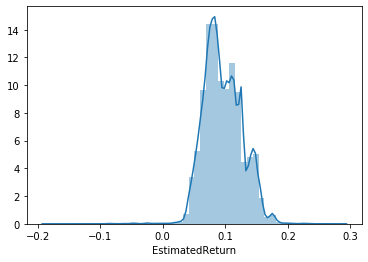

In [13]:
sb.distplot(loan['EstimatedReturn']);

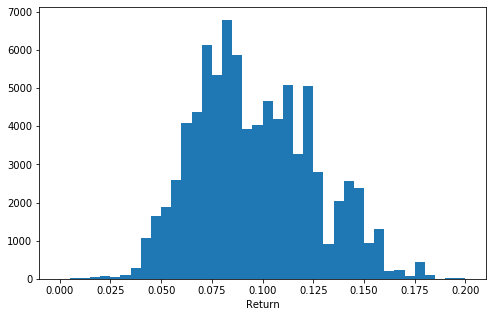

In [14]:
# start with a standard-scaled plot
binsize = .005
bins = np.arange(0, .2+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'EstimatedReturn', bins = bins)
plt.xlabel('Return')
plt.show()

Price has a long-tailed distribution on both ends, with most returns falling within 5% to 15%. There is a steeper ramp up from around 2.5% to its max of 8% than to its' final decent around 17.5%, but the graph is not extremely skewed.

Next is the predicter variable of interest.

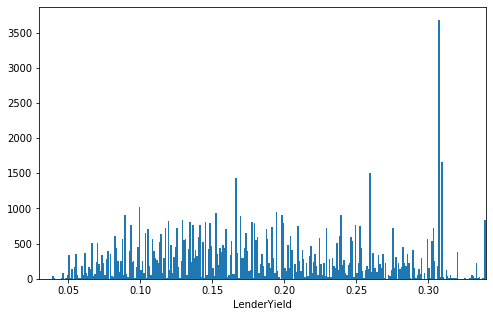

In [15]:
# plotting EstimatedReturn on a standard scale
binsize = 0.001
bins = np.arange(0, loan['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LenderYield', bins = bins)
plt.xlim([loan['LenderYield'].min(), loan['LenderYield'].max()])
plt.xlabel('LenderYield')
plt.show()


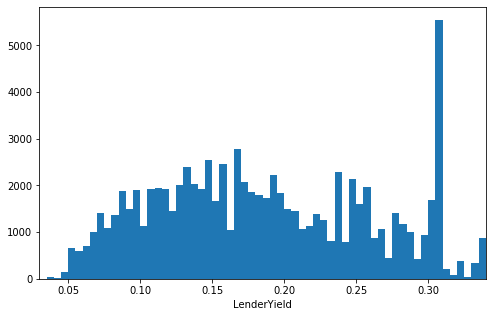

In [54]:
# plotting EstimatedReturn on a standard scale
binsize = 0.005
bins = np.arange(0, loan['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LenderYield', bins = bins)
plt.xlim([loan['LenderYield'].min(), loan['LenderYield'].max()])
plt.xlabel('LenderYield')
plt.show()

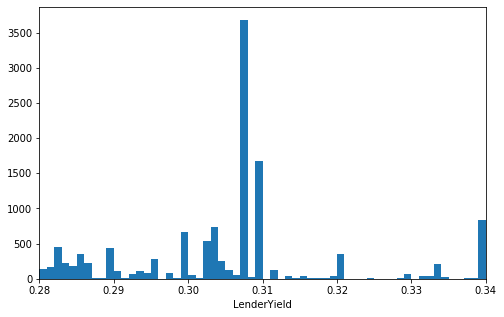

In [58]:
# plotting EstimatedReturn on a standard scale
binsize = 0.001
bins = np.arange(.28, loan['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'LenderYield', bins = bins)
plt.xlim([.28, loan['LenderYield'].max()])
plt.xlabel('LenderYield')
plt.show()

The small bin size gives some very interesting insight to yield values. The massive spike around a 30% yield is an anomoly particularly because the rest of the histogram looked to have a shape resembling a normal distribution, particularly as you zoom out more. This graph may indicate that potentially some states have a maximum yield of 30% which is given to the least reliable debitors.

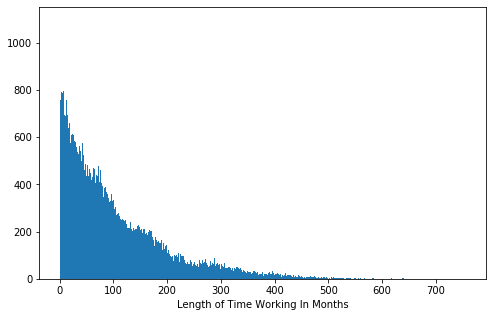

In [63]:
#What does the EmploymentStatusDuration look like? 

binsize = 1
bins = np.arange(0, loan['EmploymentStatusDuration'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'EmploymentStatusDuration', bins = bins)
plt.xlabel('Length of Time Working In Months')
plt.show()



Time worked has a long-tailed distribution with most people who take a lone not working and a decreasing progression down in terms of length of work history. 

493328 440055 0.5285375885354672 0.47146241146453277


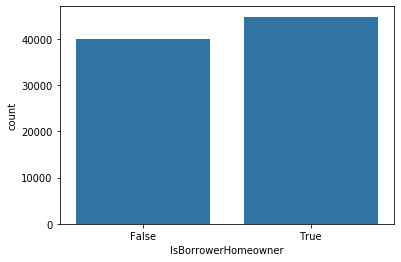

In [18]:
#What percent of borrowers are homeowners (IsBorrowerHomeowner)?

base_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'IsBorrowerHomeowner', color = base_color);

#I am storing all of these values in variables for later use:
Homeowner_count = loan[loan['IsBorrowerHomeowner'] == True].size
Non_Homeowner_count = loan[loan['IsBorrowerHomeowner'] == False].size
total = Homeowner_count + Non_Homeowner_count
Homeowner_perc = Homeowner_count/total
Non_perc = Non_Homeowner_count/total

print(Homeowner_count, Non_Homeowner_count, Homeowner_perc, Non_perc)    


In [51]:
#EstimatedEffectiveYield	EstimatedLoss

loan.head()

,Term,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),BorrowerState,EmploymentStatusDuration,IsBorrowerHomeowner
1,36,0.0920,0.0820,0.07960,0.0249,0.05470,7,2.0,CO,44.0,False
3,36,0.0974,0.0874,0.08490,0.0249,0.06000,9,16.0,GA,113.0,True
4,36,0.2085,0.1985,0.18316,0.0925,0.09066,4,2.0,MN,44.0,True
5,60,0.1314,0.1214,0.11567,0.0449,0.07077,10,1.0,NM,82.0,True
6,36,0.2712,0.2612,0.23820,0.1275,0.11070,2,1.0,KS,172.0,False


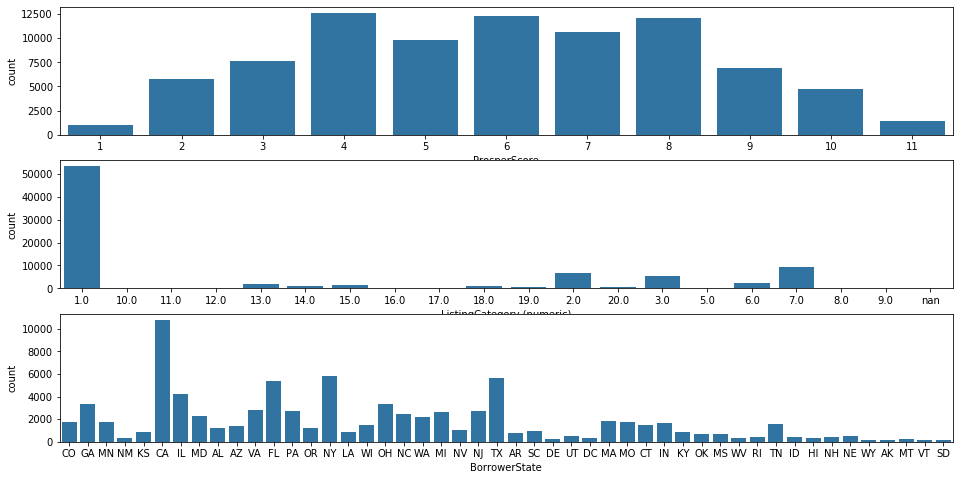

In [61]:
#ProsperScore, ListingCategory (numeric), BorrowerState

fig, ax = plt.subplots(nrows=3, figsize = [16,8])

default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'ProsperScore', color = default_color, ax = ax[0])
sb.countplot(data = loan, x = 'ListingCategory (numeric)', color = default_color, ax = ax[1])
sb.countplot(data = loan, x = 'BorrowerState', color = default_color, ax = ax[2])

plt.show()

Based on the first chart we can see that overall the ProsperScore was set up to look like a normal distribution. The. only shift is that 4 & 8 are larger than they should to make a normal distribution.
Based on the information above, we can  see that the vast majority of loans are made to those with DebtConsolidation (1) on the second chart.
Unsurprisingly, the loans by state look correlated with the population.

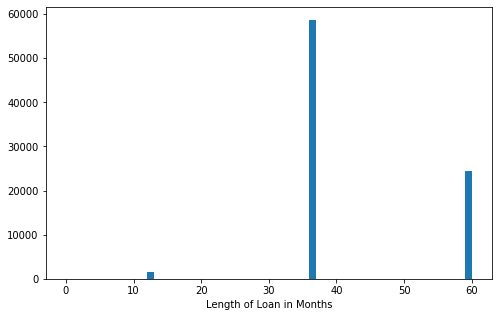

In [64]:
#What does the Term Distribution look like?

binsize = 1
bins = np.arange(0, loan['Term'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'Term', bins = bins)
plt.xlabel('Length of Loan in Months')
plt.show()


Based on this graph, all loans had a 12, 36 or 60 month period. 36 months was most popular  while 60 months was second.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
The estimated return variable is close to being normally distributed. There are no points that stand out as being particularly unusual.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The lender yield had a very unusual distribution, with a massive spike at around 30.5%-31%. I did not adjust the data set but will explore that later on.

## Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between features in the data.

In [73]:
numeric_vars = ['Term', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn'
                , 'EmploymentStatusDuration']
categoric_vars = ['ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'IsBorrowerHomeowner']

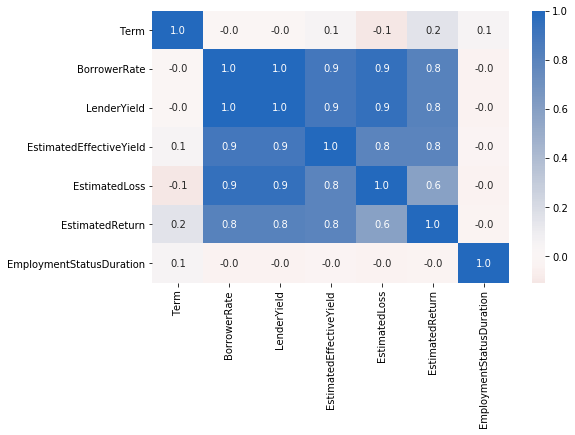

In [67]:
plt.figure(figsize = [8, 5])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.1f',
           cmap = 'vlag_r', center = 0)
plt.show()

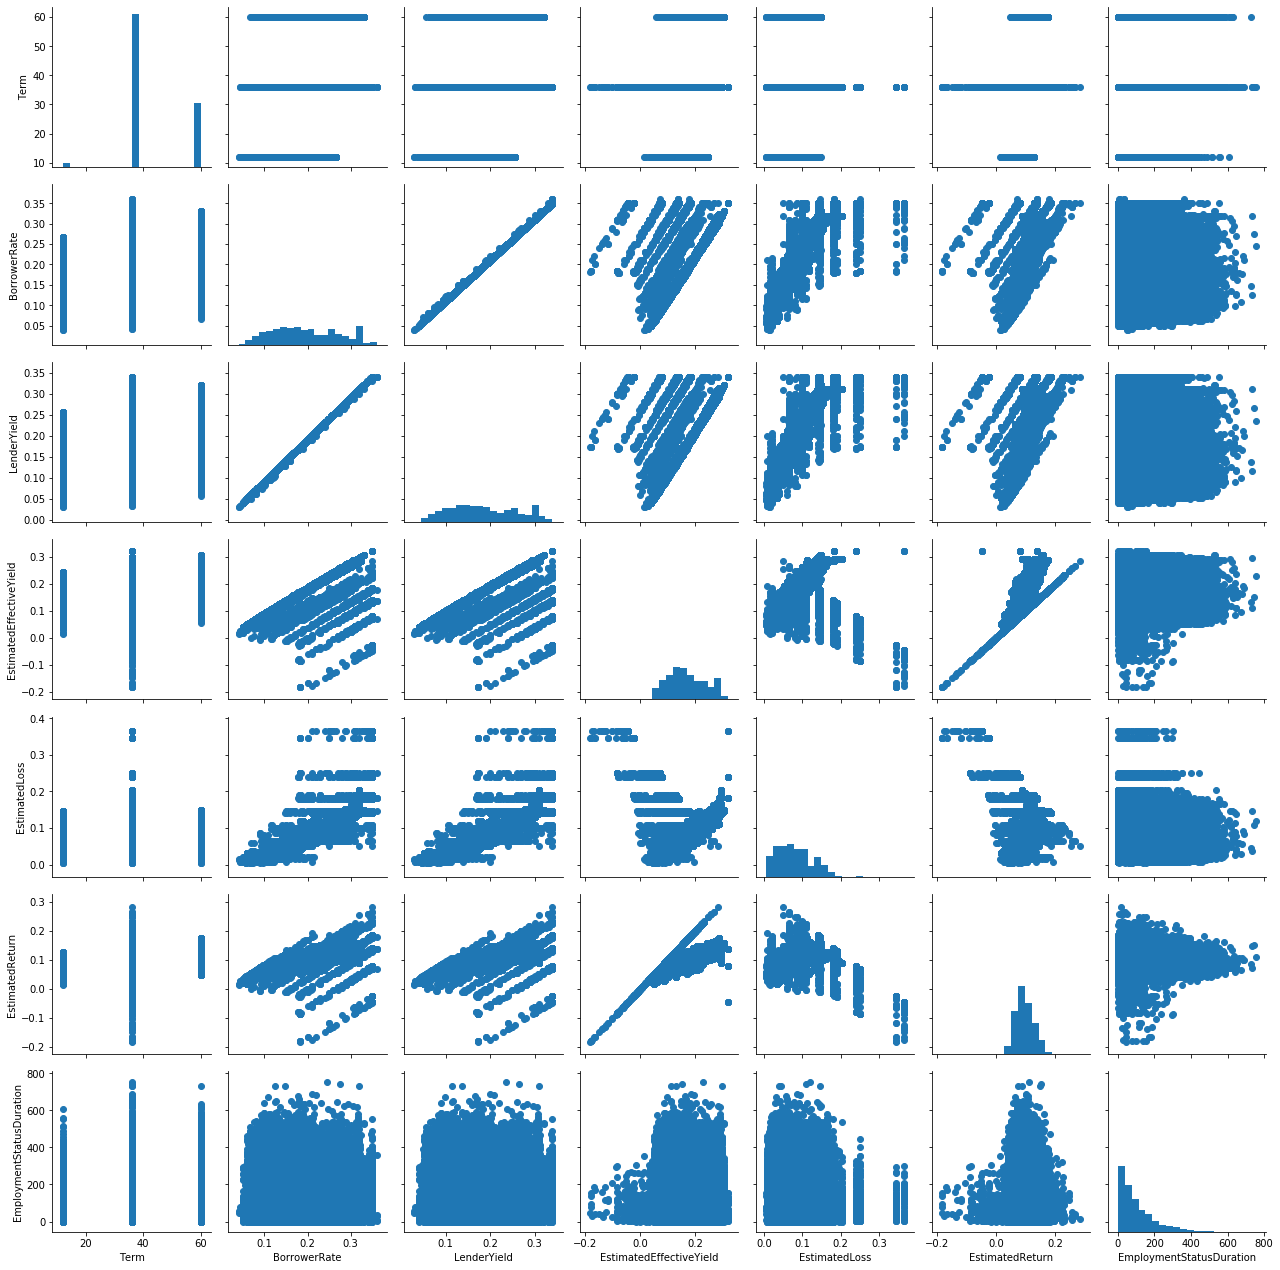

In [70]:
g = sb.PairGrid(data = loan, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Surprisingly, it looks like Employment Status has no correlation with estimated loss. You would believe that those  who are employed for a longer time period would be more able to pay their loan than those who are not, but it does not look to be the case.
Unsurprisingly, estimated loss has a negative correlation with estimated yield and effective yeild. Also, as expected, lender yield goes up as estimated loss goes up. A higher risk does require a higher return.

Now I would like to see how LenderYield,EstimatedLoss and EstimatedEffectiveYield correlate with our categorical list.

<Figure size 720x720 with 0 Axes>

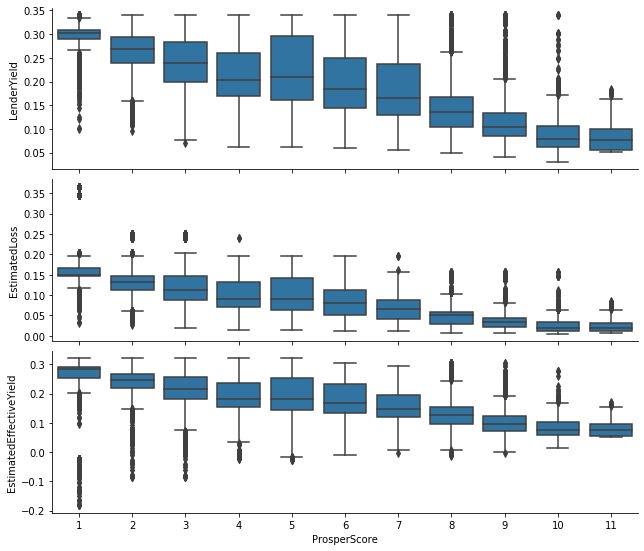

In [89]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan, y_vars = ['LenderYield', 'EstimatedLoss','EstimatedEffectiveYield'], x_vars = 'ProsperScore',
                height = 2.5, aspect = 3.5)
g.map(boxgrid)
plt.show();

<Figure size 720x720 with 0 Axes>

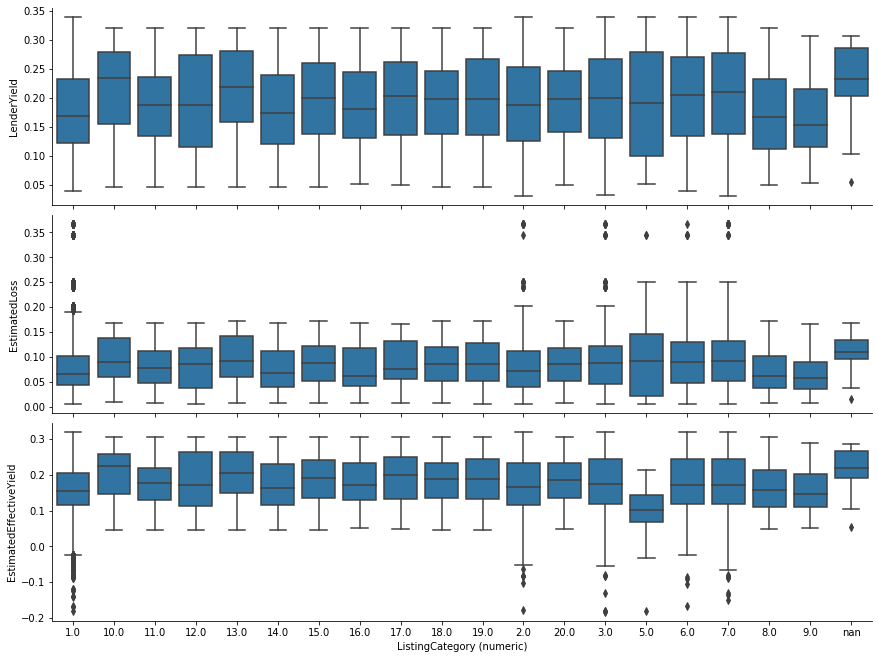

In [86]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan, y_vars = ['LenderYield', 'EstimatedLoss','EstimatedEffectiveYield'], x_vars = 'ListingCategory (numeric)',
                height = 3, aspect = 4)
g.map(boxgrid)
plt.show();

<Figure size 720x720 with 0 Axes>

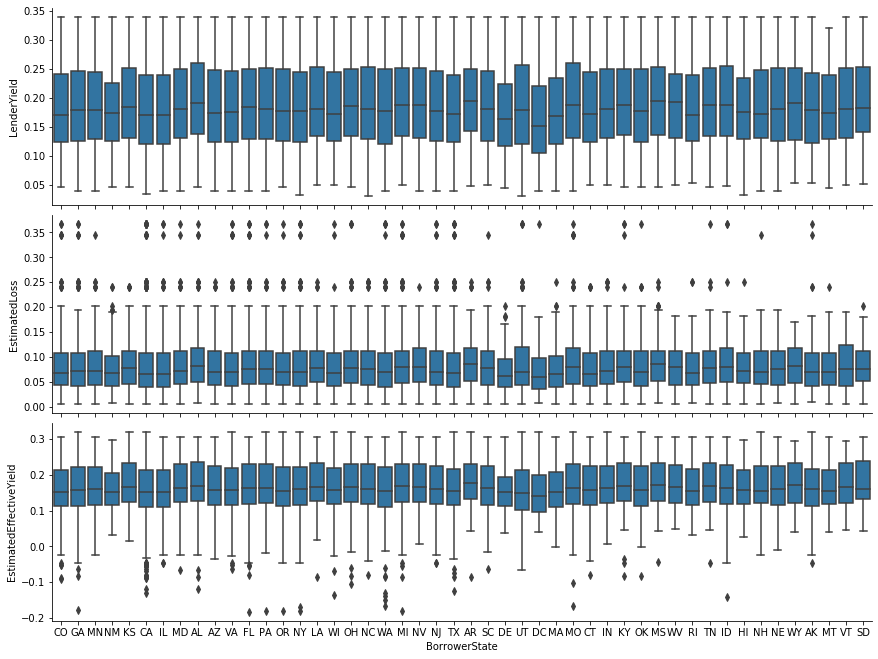

In [90]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan, y_vars = ['LenderYield', 'EstimatedLoss','EstimatedEffectiveYield'], x_vars = 'BorrowerState',
                height = 3, aspect = 4)
g.map(boxgrid)
plt.show();

<Figure size 720x720 with 0 Axes>

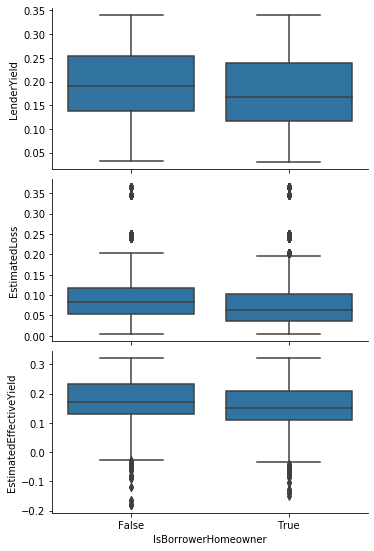

In [97]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan, y_vars = ['LenderYield', 'EstimatedLoss','EstimatedEffectiveYield'], x_vars = 'IsBorrowerHomeowner',
                height = 2.5, aspect = 2)
g.map(boxgrid)
plt.show();

From these plots, you can see that loans to homeowners have a lower yield and a lower effective yield, but, they also have a lower estimated loss. This makes intuitive sense because homeowners have a loan as collateral. <br>
The state in which one lends does not appear to have a great impact on any of these three categories, which refutes my earlier theory that some states may have a lending cap at around 31% leading to an increase in loans at that rate.<br>
As you can see from the Listing Category chart, student loans (5) have the lowest effective yeild and do not have seem to have a reduced estimated loss. This may be because many student loans are federal loans.
Finally, the prosperity score shows that the higher score one has, the lower their effective yield is. However, the top prosperity score loans almost never result in losses.

Now I will investigate the relationship between the prosperity score and home ownership.


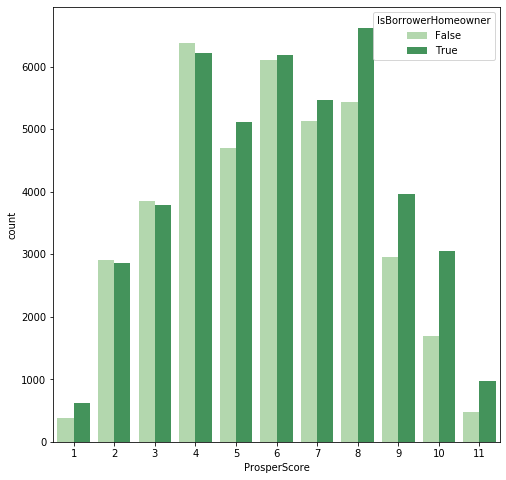

In [160]:
plt.figure(figsize = [8, 8])
sb.countplot(data = loan, x = 'ProsperScore', hue = 'IsBorrowerHomeowner', palette = 'Greens')
plt.show()

This data is less convincing than I would have expected, but there is still a noticable increase in ratio of homeowners to non-homeowners as ProsperScore increases. However, this could explain why ProsperScore is a much better indicator of estimated losses as compared to homeownership.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
There were two surprises in this dataset: one is that ones length of employment does not translate to figuring out how reliable one is to pack back their loan. The second is that there was little deviation in loan yield from state to state. I would have expected a liberal state like California, would have greater restrictions on lenders than a conservative state like Texas. 

However, as expected, a higher estimated estimated loss is positively correlated with a higher yield because a higher risk does require a higher return. The ProsperSocre is a very good indicator of this relationship.

One other point to note is that student loans carried a similar risk to other loans but generated a noticeably lower return.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
Expected relationships were found in the association between the lender yield, estimated loss and estimated return. Additionally, homeownership has a noticeable positive relationship with ProsperScore, but it was not as strong as I had expected.

## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the three categorical measures (other than lender state) of quality play into the relationship between EstimatedEffectiveYield and LenderYield.

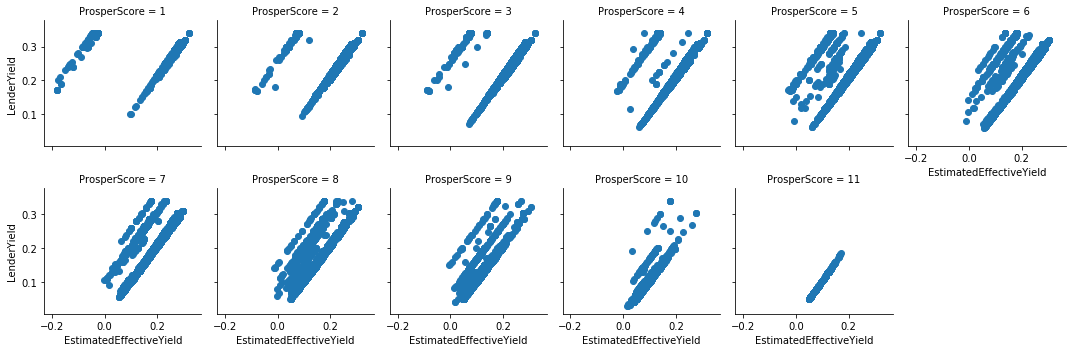

In [114]:
#categoric_vars = ['ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'IsBorrowerHomeowner']
g = sb.FacetGrid(data = loan, col ='ProsperScore' , height = 2.5, col_wrap = 6,
                margin_titles = True)
g.map(plt.scatter, 'EstimatedEffectiveYield', 'LenderYield')

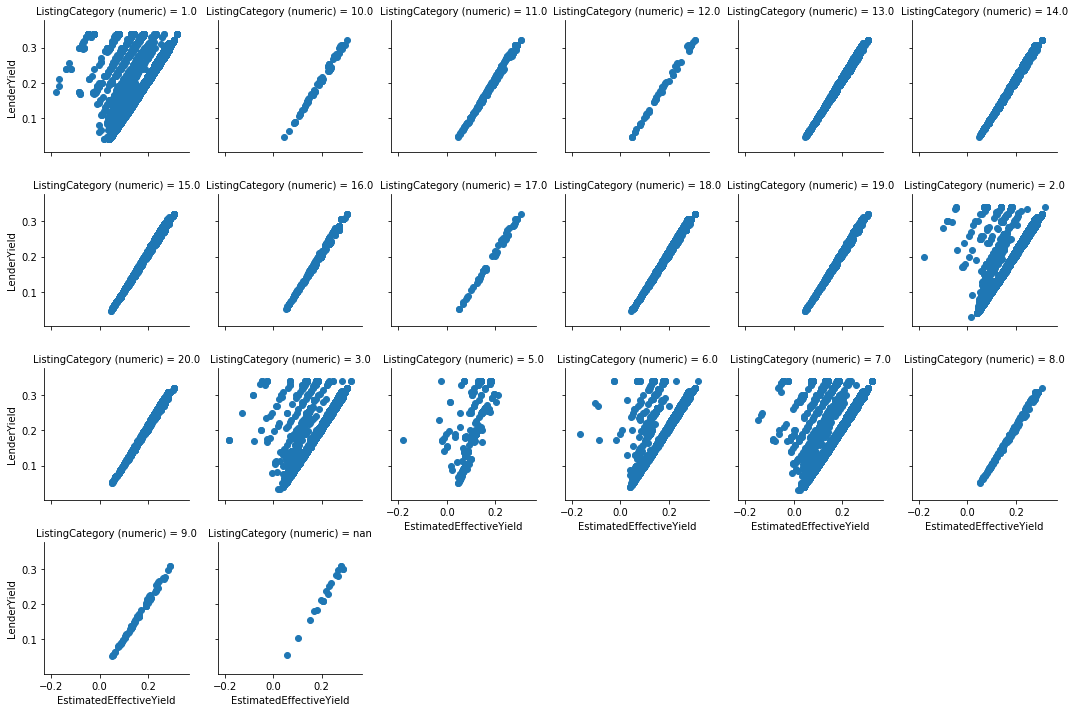

In [117]:
g = sb.FacetGrid(data = loan, col ='ListingCategory (numeric)' , height = 2.5, col_wrap = 6,
                margin_titles = True)
g.map(plt.scatter, 'EstimatedEffectiveYield', 'LenderYield')

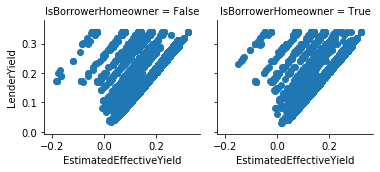

In [118]:
g = sb.FacetGrid(data = loan, col ='IsBorrowerHomeowner' , height = 2.5, col_wrap = 6,
                margin_titles = True)
g.map(plt.scatter, 'EstimatedEffectiveYield', 'LenderYield')

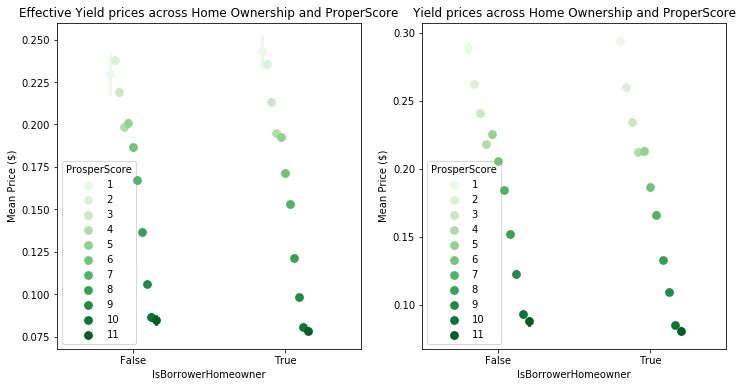

In [155]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,6])

sb.pointplot(data = loan, x = 'IsBorrowerHomeowner', y = 'EstimatedEffectiveYield', hue = 'ProsperScore',
                  dodge = 0.3, linestyles = "", ax = ax[0], palette = 'Greens')
ax[0].set_title('Effective Yield prices across Home Ownership and ProperScore')
ax[0].set_ylabel('Mean Price ($)')
ax[0].set_yticklabels([],minor = True)


sb.pointplot(data = loan, x = 'IsBorrowerHomeowner', y = 'LenderYield', hue = 'ProsperScore',
                  palette = 'Greens', linestyles = '', dodge = 0.4, ax = ax[1])
ax[1].set_title('Yield prices across Home Ownership and ProperScore')
ax[1].set_ylabel('Mean Price ($)')
ax[1].set_yticklabels([],minor = True)


plt.show();


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
I extended my investigation of EstimatedEffectiveYield and LenderYield in this section by looking at the impact of the three categorical quality features. The multivariate exploration here showed a clear positive effect of Lender Yield on Effective Yield.

### Were there any interesting or surprising interactions between features?
One of the most interesting notes in this section is how there are two distinct lines formed from the data plot on ProsperScore = 1 but as ProsperScore increased, the point came closer and closer together to the point where at ProsperScore = 11, there is almost one solid line of points.